# Chapter 3: Basic setup with Keras


In this chapter, we'll implement networks for

 Classifying movie reviews as positive or negative (binary classification) 

 Classifying news wires by topic (multiclass classification)

 Estimating the price of a house, given real-estate data (regression)

this is meant to be a simple practice playground for learning keras

In [54]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical



In [55]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Layers

Layers represent the layers of a neural network. In keras, they are like Lego blocks. They accept and output tensors of specified shapes.

Here are 3 types of Layers in keras.

1. Dense - 2D tensors (samples, features) are stored in Dense fully connected layers

2. Recurrent - 3D tensors (sample, timesteps, features) are stores in recurrent (e.g. LSTM) networks

3. Convolution (2D) - 4D tensors such as images images (width,height, depth, samples) are stored in Conv2D layers

## Loss funcs and optimizers


 Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

 Optimizer—Determines how the network will be updated based on the loss func- tion. It implements a specific variant of stochastic gradient descent (SGD).


## Typical Keras workflow

 The typical Keras workflow looks just like that example:
 
1 Define your training data: input tensors and target tensors.

2 Define a network of layers (or model ) that maps your inputs to your targets.

3 Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

4 Iterate on your training data by calling the fit() method of your model.


In [56]:
# demonstrating typical Keras workflow

# 1

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

# 3

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

# 4 

model.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0119 - acc: 0.9236
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0052 - acc: 0.9668
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0036 - acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0027 - acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0022 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0017 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0015 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0012 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0010 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 2s 33us/step - loss: 8.6427e-04 - acc: 0.

In [57]:
# try model on test

test_loss, test_acc = model.evaluate(test_images,test_labels)
print('test accuracy',test_acc)

10000/10000 [==============================] - 0s 49us/step
test accuracy 0.9801


## Two ways of defining models: Sequential and Functional

Sequential works for linear pass models

In [58]:

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

Use functional for arbitrary architectures

Here's the same model written in functional Keras

In [59]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)


## Practice Problem 1: IMDB review classifier

num_words = 10000 means we'll only keep 10k most frequent words and discard rare words

train and test data are lists of reviews

each review is a list of word indices

In [60]:
from keras.datasets import imdb

# num_words = 10000 means we'll only keep 10k most frequent words
# and discard rare words

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

Current data is a list of indices. To insert into neural network we need to make them tensors of same shape. 

To do this we one-hot encode the lists into a binary vector of size 10,000

In [61]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    
    # initializes tensor by creating an all zero matrix 
    #of shape (num_samples, dimension of one-hot vector)
    results = np.zeros((len(sequences),dimension))
    
    # set one-hot indices corresponding to word to 1 if it exists
    # in sample
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now build the model

1. 2 layers with 16 hidden units
2. a 3rd layers that outputs scalar prediction 0 or 1


In [62]:
model = models.Sequential()

# layer 1
model.add(layers.Dense(16,
                       activation='relu',
                       input_shape=(10000,)
                      ))

# layer 2
model.add(layers.Dense(16,activation='relu'))

# layer 3
model.add(layers.Dense(1,activation='sigmoid'))

# loss - binary cross entropy
# optimizer = rmsprop (momentum)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [63]:
# FOR CUSTOM OPTIMIZERS / LOSSES
"""
#optimizer:

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

#loss

from keras import losses
        from keras import metrics
        model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])

"""
print('')

Create validation set

1. set aside 10,000 samples from training data

In [64]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train for 20 epochs over all samples in mini batches of 512 samples

monitor loss and accuracy on validation set
            

In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )
                    
                    


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.4771 - acc: 0.8004 - val_loss: 0.3719 - val_acc: 0.8622
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2816 - acc: 0.9091 - val_loss: 0.2992 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2044 - acc: 0.9366 - val_loss: 0.2836 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1656 - acc: 0.9449 - val_loss: 0.2852 - val_acc: 0.8876
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1332 - acc: 0.9579 - val_loss: 0.3260 - val_acc: 0.8743
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1114 - acc: 0.9661 - val_loss: 0.3227 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0880 - acc: 0.9764 - val_loss: 0.3364 - val

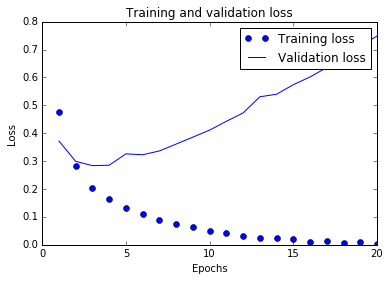

In [66]:
#plot
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

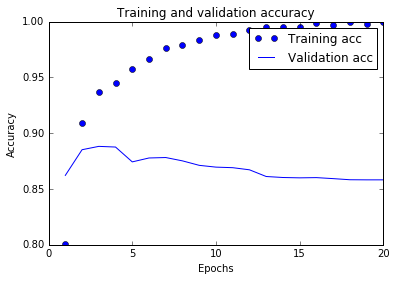

In [67]:
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
model.predict(x_test)

array([[  9.99999166e-01],
       [  3.64816941e-08],
       [  1.47337257e-03],
       ..., 
       [  1.66024212e-04],
       [  9.94938970e-01],
       [  9.93084669e-01]], dtype=float32)

## Practice Problem 2: Multiclass Classifying Newswires

In [69]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [80]:
# vectorize the training / test data
def vectorize_data(samples,dimension=10000):
    # initialize zero matrix
    results = np.zeros((len(samples),dimension))
    for i, sample in enumerate(samples):
        results[i,sample]=1
        
    return results


x_train = vectorize_data(train_data)        
x_test = vectorize_data(test_data)  


In [81]:
# vectorize the labels

def one_hot_labels(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results

one_hot_train_labels = one_hot_labels(train_labels)
one_hot_test_labels = one_hot_labels(test_labels)

We've done one-hot loading by hand. You can also do it simply in keras

one_hot_train_labels = to_categorical(train_labels)

one_hot_test_labels = to_categorical(test_labels)

In [88]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))

# note, now we're using a softmax
# this will output a probability dist over the 46 classes
# the probabilities in the output vector add to 1
model.add(layers.Dense(46,activation='softmax'))

# loss - categorical cross entropy
# optimizer - rmsprop

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# separate into training / validation sets
x_val = x_train[:1000]
partial_x_train = x_train[1000:]


y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# TRAIN THE BEAST!
# train data, train labels, epochs, batch size, validation tuple
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 106us/step - loss: 2.5085 - acc: 0.4936 - val_loss: 1.6784 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.3969 - acc: 0.7028 - val_loss: 1.3152 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.0586 - acc: 0.7751 - val_loss: 1.1313 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.8349 - acc: 0.8262 - val_loss: 1.0220 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.6605 - acc: 0.8619 - val_loss: 0.9651 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.5311 - acc: 0.8882 - val_loss: 0.8990 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.4200 - acc: 0.9107 - val_loss: 0.9212 - val_acc: 0.7940
Epoch 

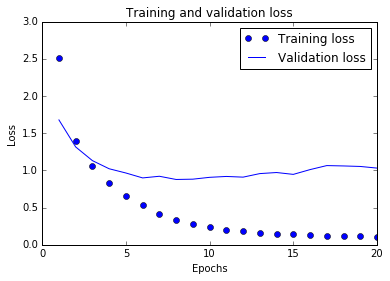

In [89]:
# plot it!


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


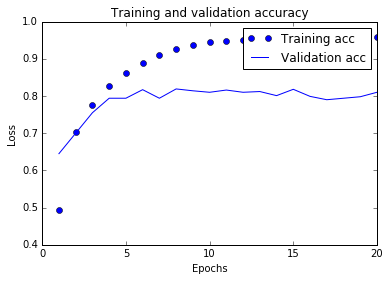

In [90]:
# clear plot
plt.clf()
# plot accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [96]:
model.predict(x_test)

array([[  7.22124474e-04,   5.27051985e-01,   7.95544183e-04, ...,
          1.45427757e-05,   1.82340792e-11,   6.43502499e-05],
       [  3.33557324e-07,   6.02726499e-03,   1.70235467e-07, ...,
          7.83417349e-08,   6.49042858e-14,   2.66768239e-07],
       [  9.02264938e-03,   3.05973440e-02,   6.58078399e-03, ...,
          3.28844966e-04,   4.58418363e-05,   7.48765073e-04],
       ..., 
       [  5.05584152e-03,   3.41325216e-02,   5.97418577e-04, ...,
          2.46562086e-05,   3.72440383e-07,   1.70168743e-04],
       [  6.08925475e-04,   7.86612451e-01,   1.67645383e-04, ...,
          1.33858885e-05,   2.81242896e-09,   2.83143418e-05],
       [  9.06658388e-05,   1.50582998e-03,   2.37333006e-05, ...,
          3.53793467e-07,   3.32770006e-10,   9.76986371e-07]], dtype=float32)

You could also use integers to encode labels

y_train = np.array(train_labels)
  
y_test = np.array(test_labels)

In this case, everything is the same but you need "sparse_categorical_crossentropy" as the optimizer, since the data is not categorical

## Practice problem 3: Predicting house prices, regression 


In [97]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [98]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


We have 404 / 102 training / test examples with 13 features.

Features can be crime rate, rooms per house, etc and have different ranges in values [min,max]

We need to normalize the data

In [103]:
# Normalize with training data as basis

# get mean of each feature
mean = train_data.mean(axis=0)

# subtract mean from values
train_data-=mean

# get standard deviation from the mean
std = train_data.std(axis=0)

# divide by std
train_data /= std

# normalize test data
test_data-=mean
test_data /= std

In [108]:
# build the model

def build_model():
    model = models.Sequential()
    # input shape is the number of features (13)
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    # no activation since regression predicts a linear, unbounded value
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

    
    

Small data set so we will run several times w different validation sets

After we run the tests, we will average the validation scores. this is called K-fold cross validation.

In [115]:
# set up

k = 4
num_val_samples=len(train_data) // k
num_epochs = 20
all_scores =[]
all_mae_histories = []
# now run k-fold

for i in range(k):
    print('processing fold #',i)
    #prepare the training data
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0
    )
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)
    # build model
    
    model = build_model()
    
    # evaluate model on validation set
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0) 
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


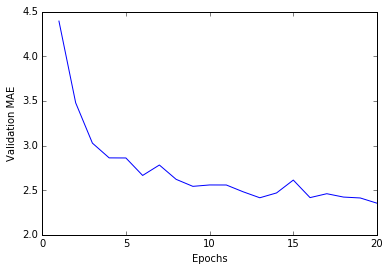

In [117]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [118]:
model = build_model()
model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [119]:
test_mae_score

2.8534683526731004